In [1]:
!pip install kaggle

In [2]:
!ls ~/.kaggle

kaggle.json


In [3]:
!mkdir ~/.kaggle

mkdir: /Users/buddhiprakashmeena/.kaggle: File exists


In [5]:
!cp ~/Downloads/kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle --version

Kaggle API 1.6.17


In [11]:
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!unzip -n nlp-getting-started.zip -d ./nlp_data


Archive:  nlp-getting-started.zip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
train  = pd.read_csv('./nlp_data/train.csv')
test = pd.read_csv('./nlp_data/test.csv')

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
!pip install emoji


  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/ef/56/4ddf8b36aa4b52077045b17ffb8958f3360b250df4143d1482d9d5bb54d5/emoji-2.14.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 4.0 MB/s eta 0:00:0000:0100:01


In [31]:
import re
import string
import emoji

In [33]:
from nltk.tokenize import word_tokenize

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/buddhiprakashmeena/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/buddhiprakashmeena/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
from nltk.stem import WordNetLemmatizer

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/buddhiprakashmeena/nltk_data...


True

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [20]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [21]:
test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [23]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [24]:
train.isnull().sum(), test.isnull().sum()

(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id             0
 keyword       26
 location    1105
 text           0
 dtype: int64)

In [28]:
test.shape,train.shape

((3263, 4), (7613, 5))

In [29]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [46]:
train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [65]:
train['keyword'].value_counts()


keyword
                         61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 222, dtype: int64

# Tweet Cleaning


In [42]:
def clean_tweet(tweet):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    # Remove @ mentions
    tweet = re.sub(r"@\w+", "", tweet)
    # Remove hashtags (keeping the words)
    tweet = re.sub(r"#", "", tweet)
    # Remove punctuation
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize the tweet using nltk
    tokens = word_tokenize(tweet)
    # Remove stopwords using nltk's list of stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize each word using WordNetLemmatizer
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    cleaned_tweet = ' '.join(lemmatized_tokens)
    return cleaned_tweet


In [43]:
train['cleaned_text'] = train['text'].apply(clean_tweet)

In [44]:
train[['text','cleaned_text']].head(10)

,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,im top hill see fire wood
8,There's an emergency evacuation happening now ...,there emergency evacuation happening building ...
9,I'm afraid that the tornado is coming to our a...,im afraid tornado coming area


In [45]:
train.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [48]:
train['keyword'] = train['keyword'].fillna('')  
train['location'] = train['location'].fillna('') 
# replacing with empty strings

In [49]:
train.head()

,id,keyword,location,text,target,cleaned_text
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,,,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


## Adding a lenght column

In [57]:
train['tweet_length'] = train['text'].str.len()
test['tweet_length'] = test['text'].str.len()

In [67]:
train.head()

,id,keyword,location,text,target,cleaned_text,tweet_length
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69
1,4,,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38
2,5,,,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133
3,6,,,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,65
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,88


In [68]:
test.head()

,id,keyword,location,text,cleaned_text,tweet_length
0,0,,,Just happened a terrible car crash,happened terrible car crash,34
1,2,,,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,64
2,3,,,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,96
3,9,,,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,40
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan,45


### Similarly applying cleaning process to test set

In [50]:
test['cleaned_text'] = test['text'].apply(clean_tweet)

In [54]:
test[['text','cleaned_text']].head(10)

,text,cleaned_text
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan
5,We're shaking...It's an earthquake,shakingits earthquake
6,They'd probably still show more life than Arse...,theyd probably still show life arsenal yesterd...
7,Hey! How are you?,hey
8,What a nice hat?,nice hat
9,Fuck off!,fuck


In [55]:
test['keyword'] = test['keyword'].fillna('')  
test['location'] = test['location'].fillna('') 
# replacing with empty strings

In [56]:
test.head()

,id,keyword,location,text,cleaned_text
0,0,,,Just happened a terrible car crash,happened terrible car crash
1,2,,,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,,,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,,,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan


# Data-plots

### visualize tweet lengths by target value

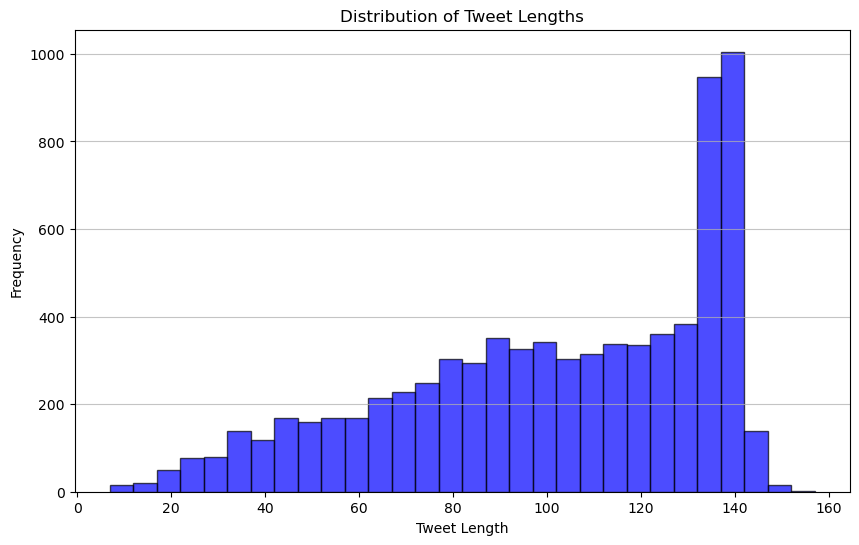

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(train['tweet_length'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

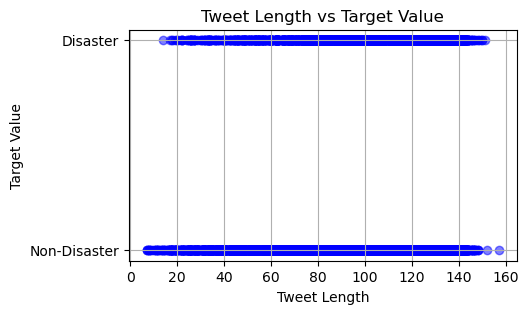

In [77]:

plt.figure(figsize=(5, 3))
plt.scatter(train['tweet_length'], train['target'], alpha=0.5, color='blue')
plt.title('Tweet Length vs Target Value')
plt.xlabel('Tweet Length')
plt.ylabel('Target Value')
plt.yticks([0, 1], ['Non-Disaster', 'Disaster'])  # Customize y-ticks for clarity
plt.grid()
plt.show()


In [76]:
target_counts = train['target'].value_counts()
target_counts

print("Number of Non-Disaster Tweets:", target_counts[0])
print("Number of Disaster Tweets:", target_counts[1])

Number of Non-Disaster Tweets: 4342
Number of Disaster Tweets: 3271


### Count the occurrences of keywords

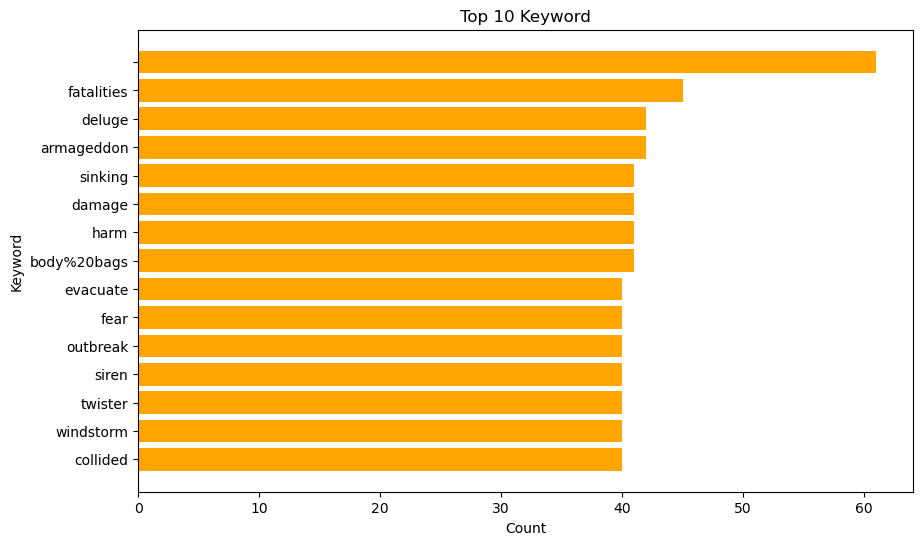

In [87]:

keywords_count = train['keyword'].value_counts().nlargest(15)

# Plotting the top 10 keywords
plt.figure(figsize=(10, 6))
plt.barh(keywords_count.index, keywords_count.values, color='orange')
plt.title('Top 10 Keyword')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### Count the occurrences of locations

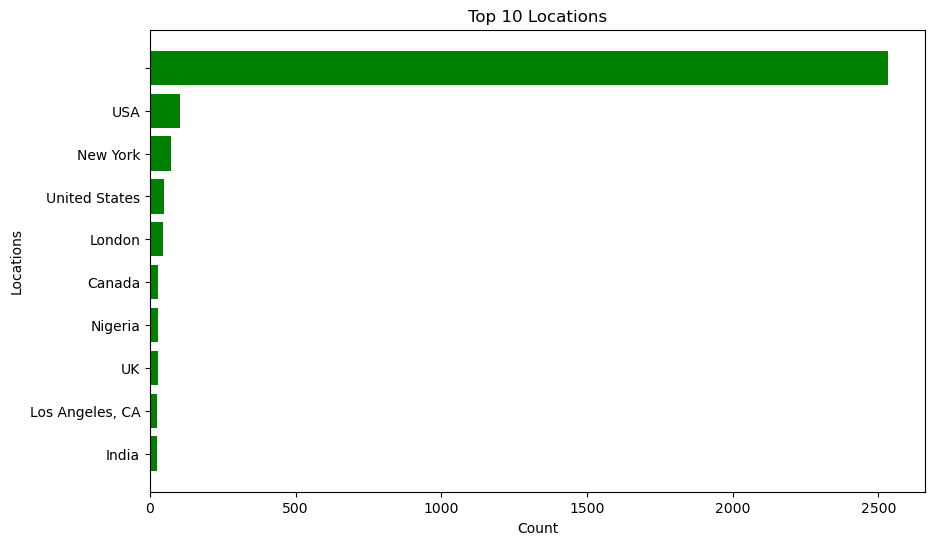

In [88]:

locations_count = train['location'].value_counts().nlargest(10)

# Plotting the top 10 locations
plt.figure(figsize=(10, 6))
plt.barh(locations_count.index, locations_count.values, color='green')
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Locations')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [89]:
train.head()

,id,keyword,location,text,target,cleaned_text,tweet_length
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69
1,4,,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38
2,5,,,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133
3,6,,,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,65
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,88


## Model Training

In [90]:
X = train['cleaned_text']
y = train['target']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [94]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [95]:
y_pred = lr_model.predict(X_val_tfidf)


In [96]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

# EVALUATION

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print("Classification Report:")
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1091
           1       0.84      0.70      0.77       813

    accuracy                           0.82      1904
   macro avg       0.82      0.80      0.81      1904
weighted avg       0.82      0.82      0.81      1904

Accuracy: 0.8167


In [99]:
correct_predictions = np.sum(y_val == y_pred)
incorrect_predictions = np.sum(y_val != y_pred)
print(f"\nNumber of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")



Number of correct predictions: 1555
Number of incorrect predictions: 349


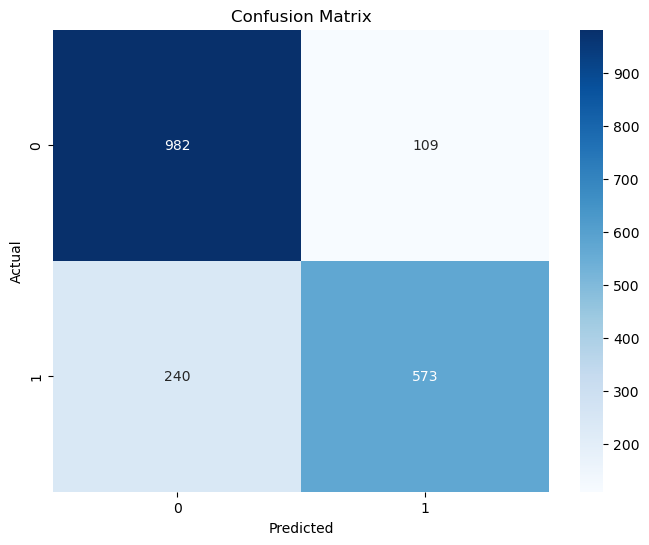

In [101]:
import seaborn as sns
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [102]:
feature_importance = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': lr_model.coef_[0]
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
         feature  importance
2083   hiroshima    3.342767
1702        fire    3.226126
4850    wildfire    2.716574
4280     suicide    2.696184
766   california    2.639255
4525       train    2.528814
1414  earthquake    2.460493
653      bombing    2.364048
2399      killed    2.360104
1730       flood    2.147630


# Test case prediction

In [103]:
X_test_tfidf = tfidf_vectorizer.transform(test['cleaned_text'])

In [104]:
test_predictions = lr_model.predict(X_test_tfidf)

In [105]:
test_predictions

array([1, 1, 1, ..., 1, 1, 0])

In [113]:
# final csv
test['target'] = test_predictions
test[['id', 'target']].to_csv('/Users/buddhiprakashmeena/Desktop/ML DAYS/submission.csv', index=False)

In [114]:
import os

In [115]:
os.getcwd()

'/Users/buddhiprakashmeena/Desktop/ML DAYS'